<h1 style="text-align: center;">CSCI 347 Final Report</h1>
    <p style="text-align: center;">Performed by: Simeon Shirshov, Jack Brown, Brady Ash, Brady Underwood, Andrew Cilker</p>

In [64]:
import pandas as pd
import numpy as np

#convert csv into dataframe
df = pd.read_csv('Data/heart.csv')

labels = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "serum_cholesterol",
          "fasting_blood_sugar", "resting_electro_results", "max_heart_rate", "exercise_induced_angina", "oldpeak",
          "slope_peak_exercise_st", "major_vessels", "thal", "presence_of_disease"]

df.columns = labels
np_array = np.array(df)
labeled_df = pd.DataFrame(np_array, columns=labels)

#print dataframe with all attributes
# print(labeled_df)

#delete categorical data from dataframe
labeled_df = labeled_df.drop(columns=["sex", "chest_pain_type","fasting_blood_sugar", "resting_electro_results", "exercise_induced_angina", "major_vessels", "thal", "slope_peak_exercise_st"])

#print new dataframe with only numerical attributes
print(labeled_df)

column_names = list(labeled_df.columns)
print(column_names)


      age  resting_blood_pressure  serum_cholesterol  max_heart_rate  oldpeak   
0    67.0                   115.0              564.0           160.0      1.6  \
1    57.0                   124.0              261.0           141.0      0.3   
2    64.0                   128.0              263.0           105.0      0.2   
3    74.0                   120.0              269.0           121.0      0.2   
4    65.0                   120.0              177.0           140.0      0.4   
..    ...                     ...                ...             ...      ...   
264  52.0                   172.0              199.0           162.0      0.5   
265  44.0                   120.0              263.0           173.0      0.0   
266  56.0                   140.0              294.0           153.0      1.3   
267  57.0                   140.0              192.0           148.0      0.4   
268  67.0                   160.0              286.0           108.0      1.5   

     presence_of_disease  


# KMeans Clustering

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(labeled_df)
transformed = pca.transform(labeled_df)
labeled_array = labeled_df.to_numpy()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


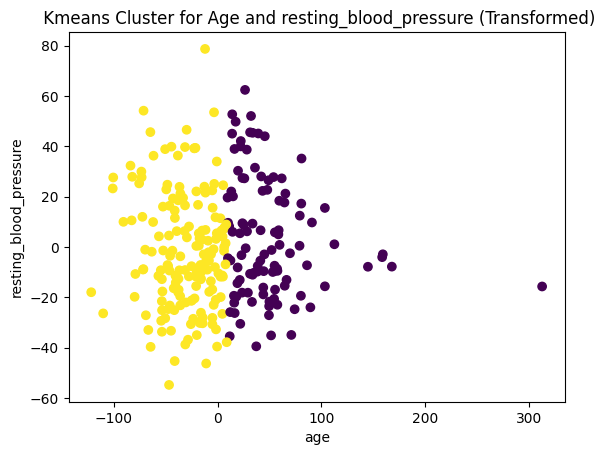

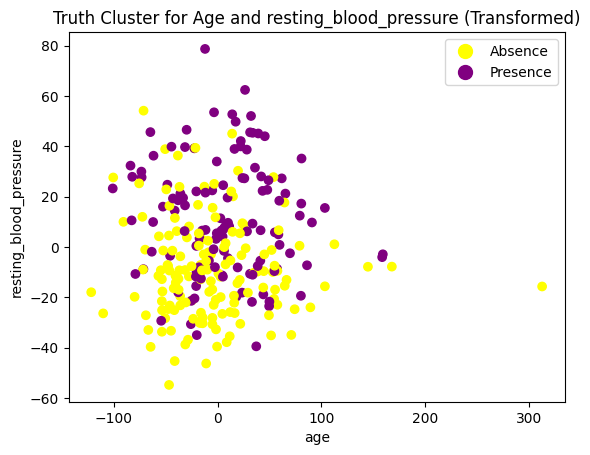

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


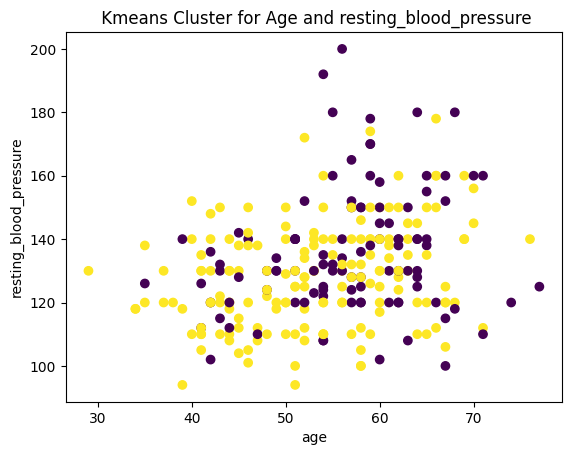

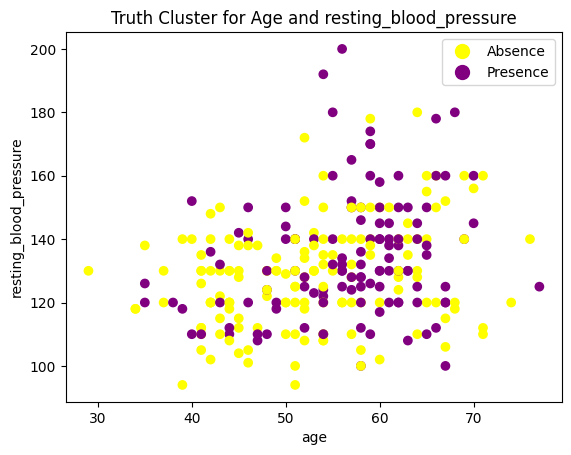

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


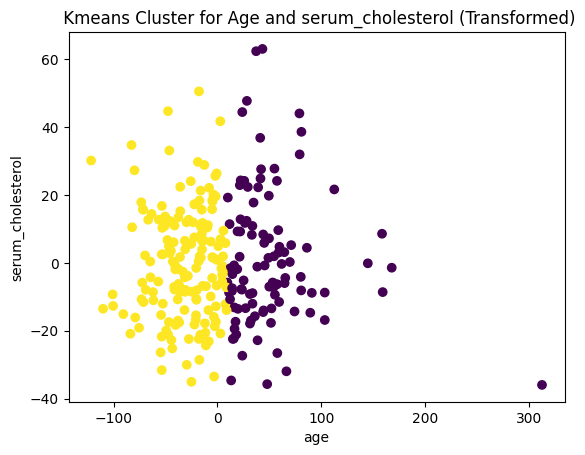

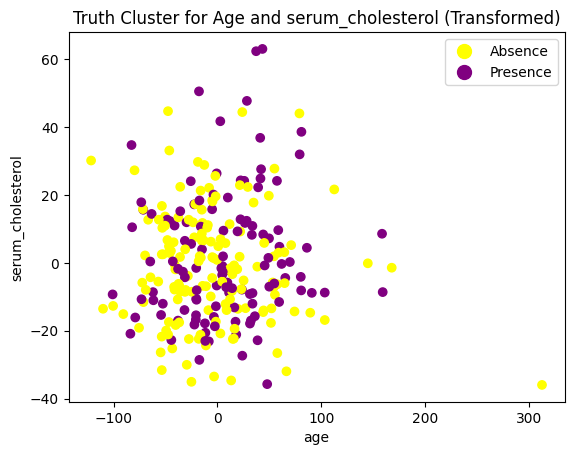

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


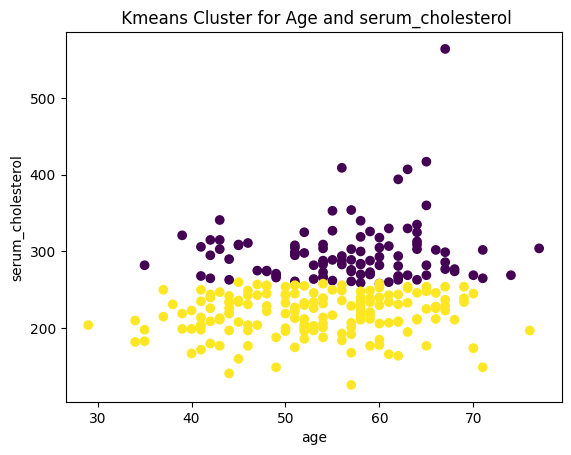

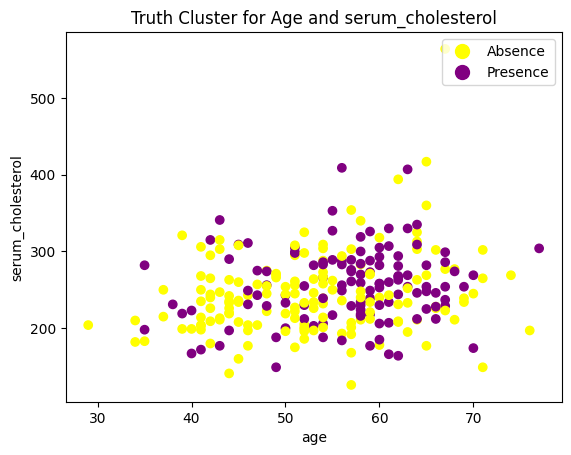

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


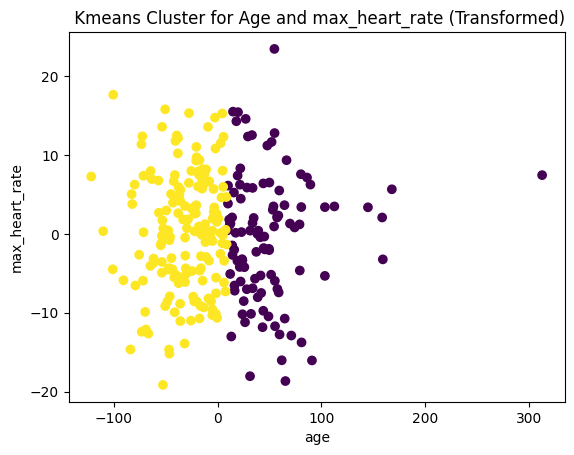

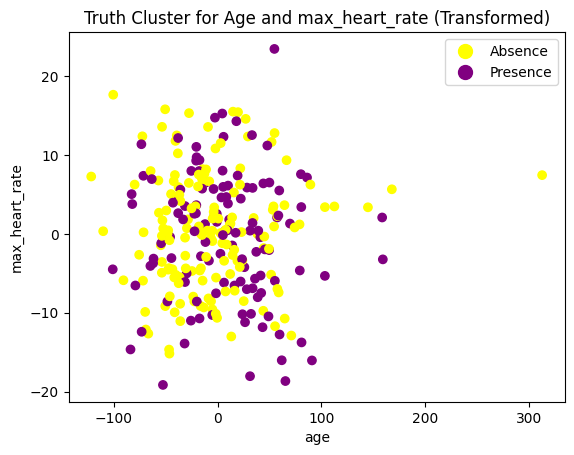

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


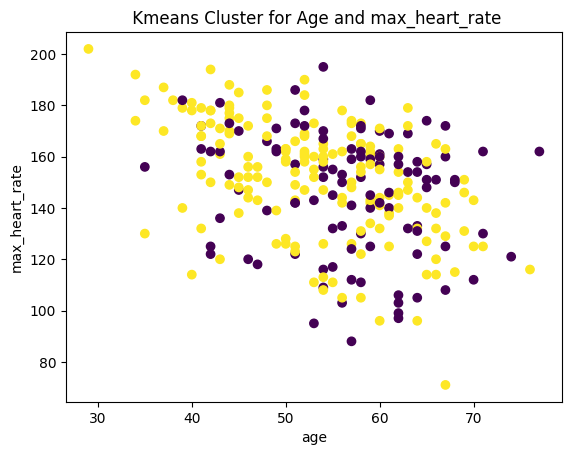

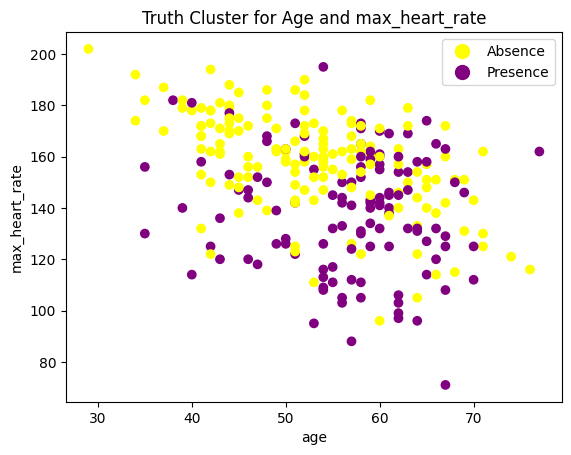

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


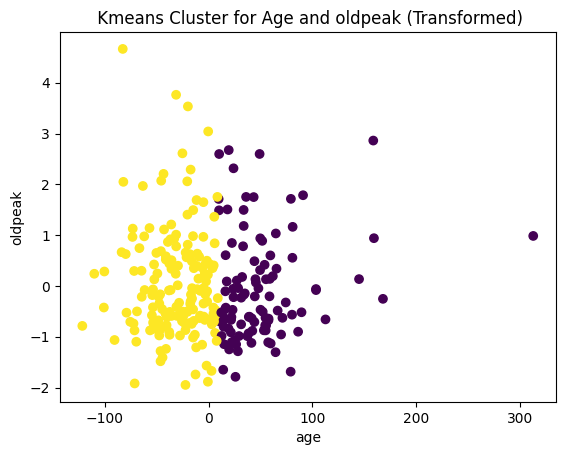

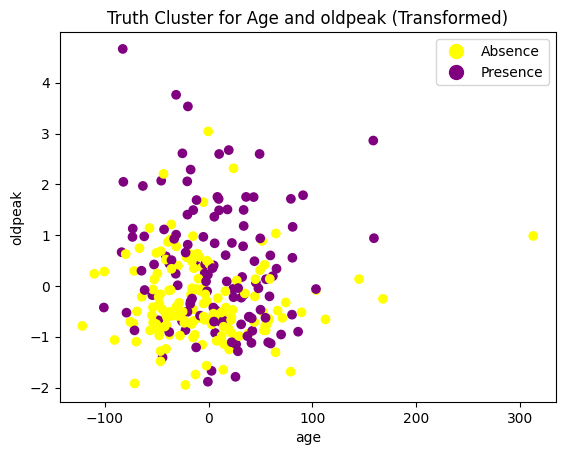

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


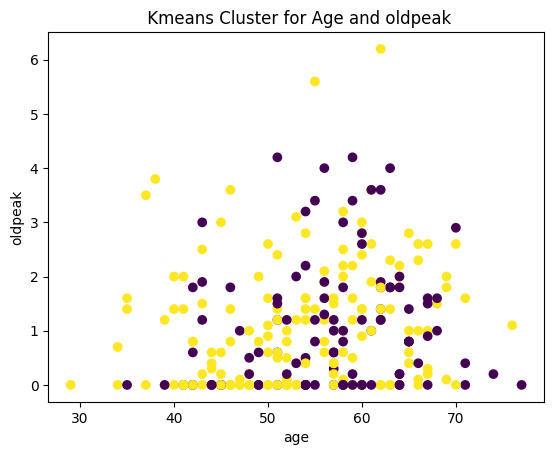

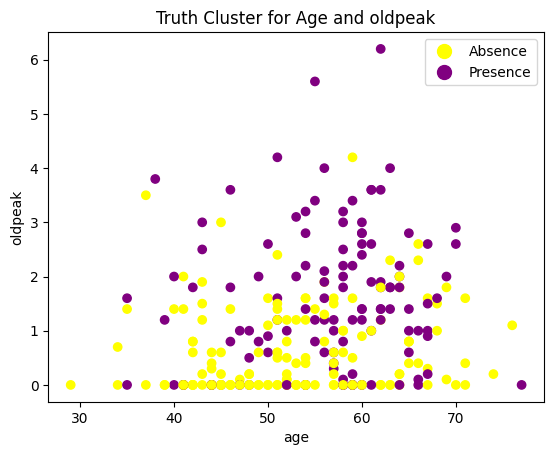

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors


#-------------------------------------------Resting Blood Pressure
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(transformed)
plt.scatter(transformed[:, 0], transformed[:, 1], c=cluster_labels)
plt.title(' Kmeans Cluster for Age and resting_blood_pressure (Transformed)')
plt.xlabel('age')
plt.ylabel('resting_blood_pressure')
plt.show()


x = transformed[:, 0]
y = transformed[:, 1]
colors = labeled_df['presence_of_disease']
cmap = mcolors.ListedColormap(['yellow', 'purple'])
plt.scatter(x, y, c=colors, cmap=cmap)
yell = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='yellow', label='Absence')[0]
purp = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='purple', label='Presence')[0]
plt.legend(handles=[yell, purp], loc='upper right')
plt.xlabel('age')
plt.ylabel('resting_blood_pressure')
plt.title('Truth Cluster for Age and resting_blood_pressure (Transformed)')
plt.show()


kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(labeled_array)
plt.scatter(labeled_array[:, 0], labeled_array[:, 1], c=cluster_labels)
plt.title(' Kmeans Cluster for Age and resting_blood_pressure')
plt.xlabel('age')
plt.ylabel('resting_blood_pressure')
plt.show()


x = labeled_df['age']
y = labeled_df['resting_blood_pressure']
colors = labeled_df['presence_of_disease']
cmap = mcolors.ListedColormap(['yellow', 'purple'])
plt.scatter(x, y, c=colors, cmap=cmap)
plt.legend(handles=[yell, purp], loc='upper right')
plt.xlabel('age')
plt.ylabel('resting_blood_pressure')
plt.title('Truth Cluster for Age and resting_blood_pressure')
plt.show()

#-------------------------------------------serum_cholesterol
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(transformed)
plt.scatter(transformed[:, 0], transformed[:, 2], c=cluster_labels)
plt.title(' Kmeans Cluster for Age and serum_cholesterol (Transformed)')
plt.xlabel('age')
plt.ylabel('serum_cholesterol')
plt.show()


x = transformed[:, 0]
y = transformed[:, 2]
colors = labeled_df['presence_of_disease']
cmap = mcolors.ListedColormap(['yellow', 'purple'])
plt.scatter(x, y, c=colors, cmap=cmap)
yell = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='yellow', label='Absence')[0]
purp = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='purple', label='Presence')[0]
plt.legend(handles=[yell, purp], loc='upper right')
plt.xlabel('age')
plt.ylabel('serum_cholesterol')
plt.title('Truth Cluster for Age and serum_cholesterol (Transformed)')
plt.show()


kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(labeled_array)
plt.scatter(labeled_array[:, 0], labeled_array[:, 2], c=cluster_labels)
plt.title(' Kmeans Cluster for Age and serum_cholesterol')
plt.xlabel('age')
plt.ylabel('serum_cholesterol')
plt.show()


x = labeled_df['age']
y = labeled_df['serum_cholesterol']
colors = labeled_df['presence_of_disease']
cmap = mcolors.ListedColormap(['yellow', 'purple'])
plt.scatter(x, y, c=colors, cmap=cmap)
plt.legend(handles=[yell, purp], loc='upper right')
plt.xlabel('age')
plt.ylabel('serum_cholesterol')
plt.title('Truth Cluster for Age and serum_cholesterol')
plt.show()

#-------------------------------------------max_heart_rate
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(transformed)
plt.scatter(transformed[:, 0], transformed[:, 3], c=cluster_labels)
plt.title(' Kmeans Cluster for Age and max_heart_rate (Transformed)')
plt.xlabel('age')
plt.ylabel('max_heart_rate')
plt.show()


x = transformed[:, 0]
y = transformed[:, 3]
colors = labeled_df['presence_of_disease']
cmap = mcolors.ListedColormap(['yellow', 'purple'])
plt.scatter(x, y, c=colors, cmap=cmap)
yell = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='yellow', label='Absence')[0]
purp = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='purple', label='Presence')[0]
plt.legend(handles=[yell, purp], loc='upper right')
plt.xlabel('age')
plt.ylabel('max_heart_rate')
plt.title('Truth Cluster for Age and max_heart_rate (Transformed)')
plt.show()


kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(labeled_array)
plt.scatter(labeled_array[:, 0], labeled_array[:, 3], c=cluster_labels)
plt.title(' Kmeans Cluster for Age and max_heart_rate')
plt.xlabel('age')
plt.ylabel('max_heart_rate')
plt.show()


x = labeled_df['age']
y = labeled_df['max_heart_rate']
colors = labeled_df['presence_of_disease']
cmap = mcolors.ListedColormap(['yellow', 'purple'])
plt.scatter(x, y, c=colors, cmap=cmap)
plt.legend(handles=[yell, purp], loc='upper right')
plt.xlabel('age')
plt.ylabel('max_heart_rate')
plt.title('Truth Cluster for Age and max_heart_rate')
plt.show()

#-------------------------------------------oldpeak
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(transformed)
plt.scatter(transformed[:, 0], transformed[:, 4], c=cluster_labels)
plt.title(' Kmeans Cluster for Age and oldpeak (Transformed)')
plt.xlabel('age')
plt.ylabel('oldpeak')
plt.show()


x = transformed[:, 0]
y = transformed[:, 4]
colors = labeled_df['presence_of_disease']
cmap = mcolors.ListedColormap(['yellow', 'purple'])
plt.scatter(x, y, c=colors, cmap=cmap)
yell = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='yellow', label='Absence')[0]
purp = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='purple', label='Presence')[0]
plt.legend(handles=[yell, purp], loc='upper right')
plt.xlabel('age')
plt.ylabel('oldpeak')
plt.title('Truth Cluster for Age and oldpeak (Transformed)')
plt.show()


kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(labeled_array)
plt.scatter(labeled_array[:, 0], labeled_array[:, 4], c=cluster_labels)
plt.title(' Kmeans Cluster for Age and oldpeak')
plt.xlabel('age')
plt.ylabel('oldpeak')
plt.show()


x = labeled_df['age']
y = labeled_df['oldpeak']
colors = labeled_df['presence_of_disease']
cmap = mcolors.ListedColormap(['yellow', 'purple'])
plt.scatter(x, y, c=colors, cmap=cmap)
plt.legend(handles=[yell, purp], loc='upper right')
plt.xlabel('age')
plt.ylabel('oldpeak')
plt.title('Truth Cluster for Age and oldpeak')
plt.show()


# DBSCAN Clustering

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(labeled_df)
transformed = pca.transform(labeled_df)
labeled_array = labeled_df.to_numpy()

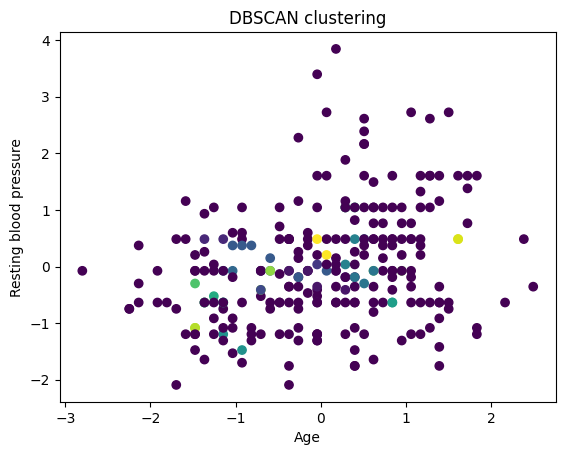

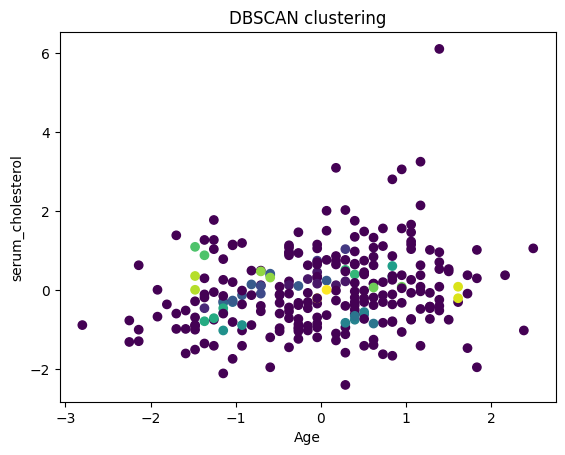

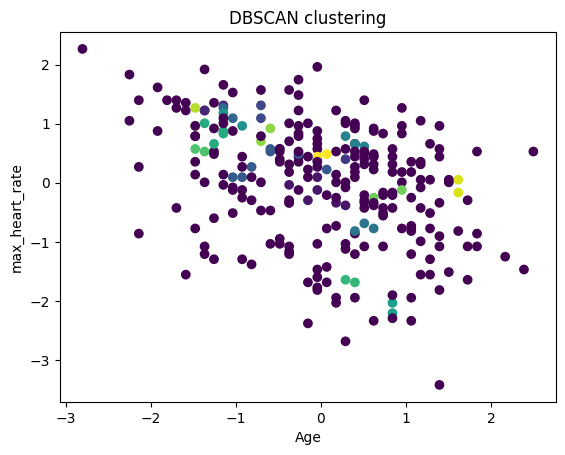

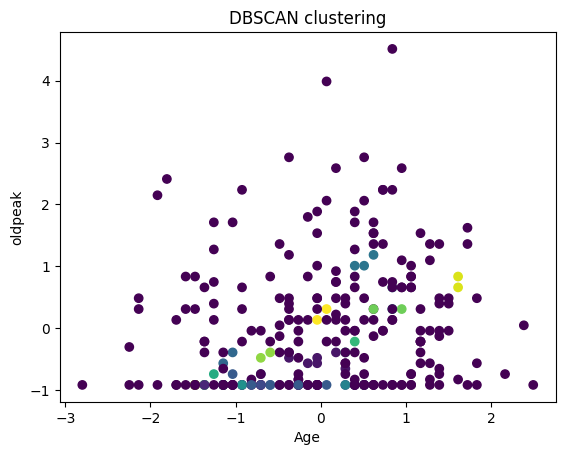

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'oldpeak', 'presence_of_disease']
#-------------------------------------------Resting Blood Pressure
scaler = StandardScaler()
X = scaler.fit_transform(labeled_df.drop('presence_of_disease', axis=1))

dbscan = DBSCAN(eps=.5, min_samples=2)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Resting blood pressure')
plt.title('DBSCAN clustering')
plt.show()

#-------------------------------------------serum_cholesterol
scaler = StandardScaler()
X = scaler.fit_transform(labeled_df.drop('presence_of_disease', axis=1))

dbscan = DBSCAN(eps=.5, min_samples=2)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 2], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('serum_cholesterol')
plt.title('DBSCAN clustering')
plt.show()

#-------------------------------------------max_heart_rate
scaler = StandardScaler()
X = scaler.fit_transform(labeled_df.drop('presence_of_disease', axis=1))

dbscan = DBSCAN(eps=.5, min_samples=2)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 3], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('max_heart_rate')
plt.title('DBSCAN clustering')
plt.show()

#-------------------------------------------oldpeak
scaler = StandardScaler()
X = scaler.fit_transform(labeled_df.drop('presence_of_disease', axis=1))

dbscan = DBSCAN(eps=.5, min_samples=2)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 4], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('oldpeak')
plt.title('DBSCAN clustering')
plt.show()
